In [7]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold,ShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.metrics import roc_curve, auc


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


%matplotlib inline
import random

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
data.shape


(3276, 10)

In [10]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


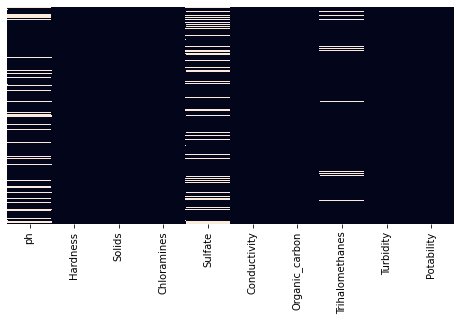

In [11]:
plt.figure(figsize=(8,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [12]:
(data.isnull().sum()/len(data) *100).sort_values(ascending=False)


Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Potability          0.000000
Turbidity           0.000000
Organic_carbon      0.000000
Conductivity        0.000000
Chloramines         0.000000
Solids              0.000000
Hardness            0.000000
dtype: float64

In [15]:
data['Sulfate_null'] =np.where(data['Sulfate'].isnull(),1,0)
data['Sulfate'].fillna(data['Sulfate'].mean(),inplace=True)


In [17]:
data['ph_null'] =np.where(data['ph'].isnull(),1,0)
data['ph'].fillna(data['ph'].mean(),inplace=True)

In [18]:
data['Trihalomethanes_null'] =np.where(data['Trihalomethanes'].isnull(),1,0)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(),inplace=True)


In [19]:
data.isnull().sum()

ph                      0
Hardness                0
Solids                  0
Chloramines             0
Sulfate                 0
Conductivity            0
Organic_carbon          0
Trihalomethanes         0
Turbidity               0
Potability              0
Sulfate_null            0
ph_null                 0
Trihalomethanes_null    0
dtype: int64

Not potable(0): 1998
Potable(1): 1278


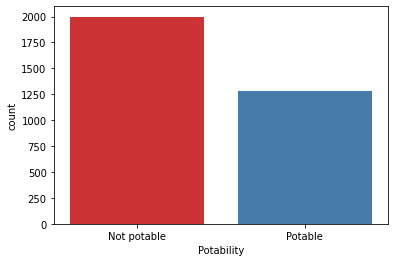

In [20]:
ax =sns.countplot(data.Potability,palette="Set1")
ax.set_xticklabels(['Not potable','Potable'])
print('Not potable(0):',data.Potability.value_counts()[0])
print('Potable(1):',data.Potability.value_counts()[1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7a0d298d0>],
      dtype=object)

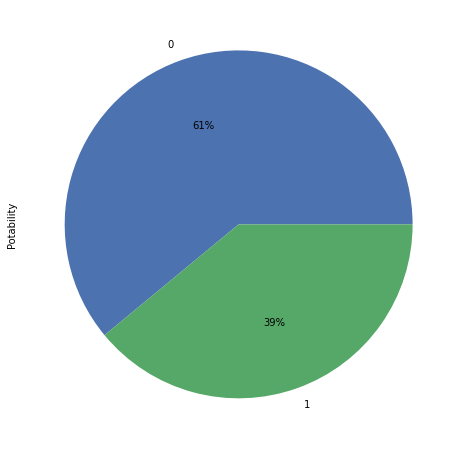

In [21]:
style.use('seaborn-deep')
labels=[0,1]
data['Potability'].value_counts().plot(kind='pie',labels=labels,subplots=True,autopct='%1.0f%%',labeldistance=1.1, figsize=(8,8))

Text(0.5, 1.0, 'Distribution of pH')

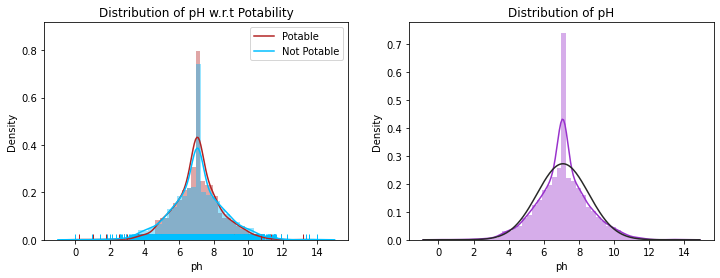

In [23]:
from scipy.stats import norm

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['ph'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['ph'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of pH w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['ph'],fit=norm,color='darkorchid')
plt.title('Distribution of pH')

Text(0.5, 1.0, 'Distribution of Hardness w.r.t Potability')

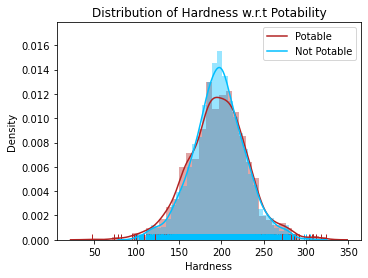

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Hardness'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Hardness'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Hardness w.r.t Potability')


Text(0.5, 1.0, 'Distribution of Hardness')

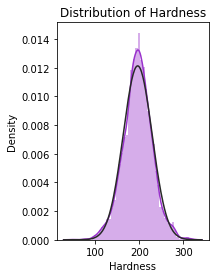

In [25]:
plt.subplot(1,2,2)
sns.distplot(data['Hardness'],fit=norm,color='darkorchid')
plt.title('Distribution of Hardness')

Text(0.5, 1.0, 'Distribution of Solids w.r.t Potability')

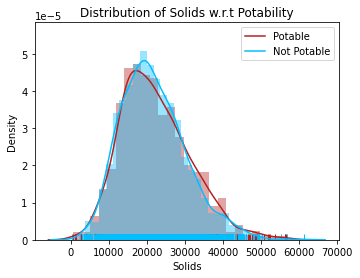

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Solids'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Solids'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Solids w.r.t Potability')

Text(0.5, 1.0, 'Distribution of Solids')

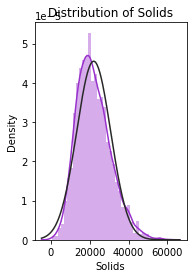

In [27]:
plt.subplot(1,2,2)
sns.distplot(data['Solids'],fit=norm,color='darkorchid')
plt.title('Distribution of Solids')

Text(0.5, 1.0, 'Distribution of Conductivity w.r.t Potability')

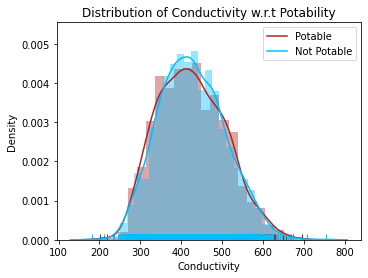

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Conductivity'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Conductivity'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Conductivity w.r.t Potability')

Text(0.5, 1.0, 'Distribution of Conductivity')

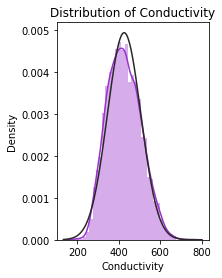

In [29]:
plt.subplot(1,2,2)
sns.distplot(data['Conductivity'],fit=norm,color='darkorchid')
plt.title('Distribution of Conductivity')

Text(0.5, 1.0, 'Distribution of Chloramines w.r.t Potability')

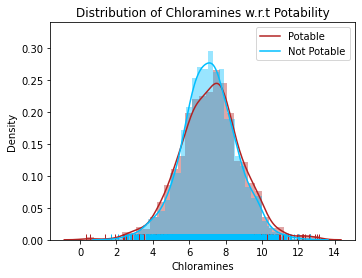

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Chloramines'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Chloramines'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Chloramines w.r.t Potability')

Text(0.5, 1.0, 'Distribution of Chloramines')

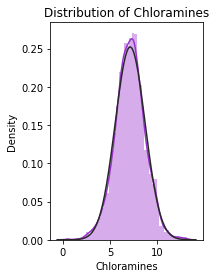

In [31]:
plt.subplot(1,2,2)
sns.distplot(data['Chloramines'],fit=norm,color='darkorchid')
plt.title('Distribution of Chloramines')

Text(0.5, 1.0, 'Distribution of Organic_carbon')

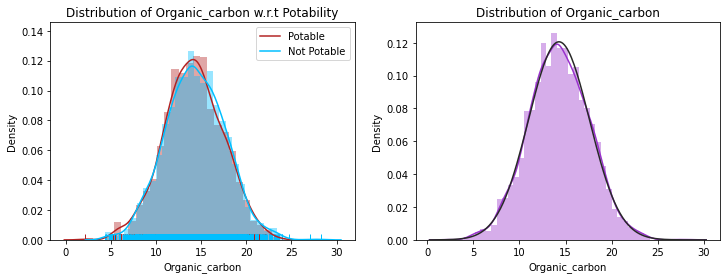

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Organic_carbon'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Organic_carbon'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Organic_carbon w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Organic_carbon'],fit=norm,color='darkorchid')
plt.title('Distribution of Organic_carbon')

Text(0.5, 1.0, 'Distribution of Trihalomethanes')

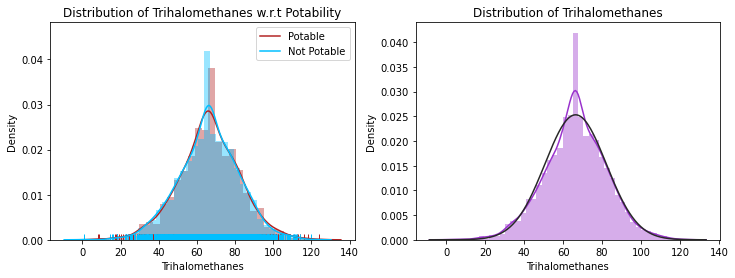

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Trihalomethanes'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Trihalomethanes'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Trihalomethanes w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Trihalomethanes'],fit=norm,color='darkorchid')
plt.title('Distribution of Trihalomethanes')

Text(0.5, 1.0, 'Distribution of Turbidity')

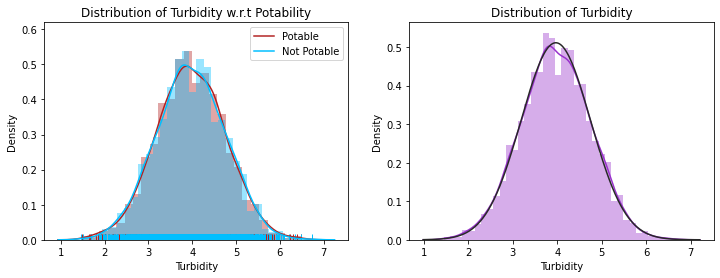

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Turbidity'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Turbidity'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Turbidity w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Turbidity'],fit=norm,color='darkorchid')
plt.title('Distribution of Turbidity')

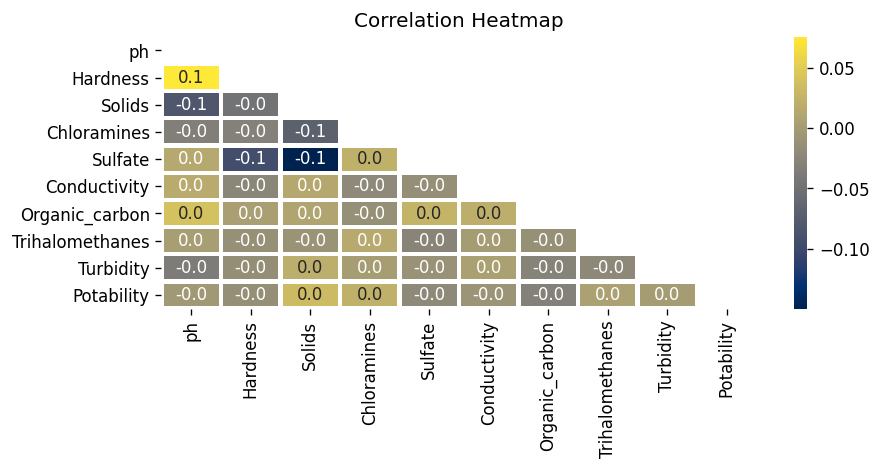

In [37]:
columns= [x for x in data.columns if 'null' not in x ]
plt.figure(dpi = 120,figsize= (8,3))
mask = np.triu(np.ones_like(data[columns].corr(),dtype = bool))
sns.heatmap(data[columns].corr(),mask = mask, fmt = ".1f",annot=True,lw=2,cmap = 'cividis',)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()